In [39]:
import pandas as pd
import numpy as np
import json
import re

In [2]:
filename = 'times.txt'
csv = pd.read_csv(filename)

In [3]:
import matplotlib.pyplot as plt

In [ ]:
df = csv

def reformatTime(input):
    aInput = input.split(":")
    minutes =int(aInput[0])
    seconds = int(aInput[1].split(".")[0])
    return minutes*60 + seconds


for i in range(len(df["totaltime"])):
    df["totaltime"][i] = reformatTime(df["totaltime"][i])
    

In [ ]:
df2 = pd.DataFrame(columns=['Cores', 'Runtime (s)', 'CPU Usage' 'Memory (k)'])

myJson = {}

for i in range(len(df["program"])):

    aKey = df["program"][i].split()
    primaryKey = aKey[1]
    secondaryKey = "x" + aKey[4]+ "y" + aKey[5]

    entry = {"Cores": int(aKey[4])*int(aKey[5]), "Runtime (s)": df["totaltime"]
             [i], "CPU Usage": df["cpu"][i], "Memory (k)": df["memory"][i]}

    if primaryKey in myJson.keys():
        if secondaryKey in myJson[primaryKey].keys():
            myJson[primaryKey][secondaryKey].append(entry)
        else:
           myJson[primaryKey][secondaryKey] = []
           myJson[primaryKey][secondaryKey].append(entry)  
    else:
        myJson[primaryKey] = {}
        myJson[primaryKey][secondaryKey] = []
        myJson[primaryKey][secondaryKey].append(entry)

print(myJson)


In [101]:
myLocalJson =  myJson["600"]
#myLocalJson =  myJson["150"]
#myLocalJson =  myJson["33"]
plotJson = {}
for key in myLocalJson:
    amountThreads = myLocalJson[key][0]["Cores"]
    runtime = 0
    usage = 0
    mem = 0
    length = len(myLocalJson[key])
    for i in range(length):
        runtime += int(myLocalJson[key][i]["Runtime (s)"])
        usage += int(myLocalJson[key][i]["CPU Usage"].replace("%",""))
        mem += int(myLocalJson[key][i]["Memory (k)"])
    
    runtime/= length
    usage/= length
    usage/= amountThreads
    mem/= length   
    if not amountThreads in plotJson.keys():
        plotJson[amountThreads] = []
    plotJson[amountThreads].append({"Cores":amountThreads, "Runtime (s)":runtime, "CPU Usage":usage, "Memory (k)":mem})

    finalPlotJson = {}
    for key in plotJson:
        amountThreads = plotJson[key][0]["Cores"]
        runtime = 0
        usage = 0
        mem = 0
        length = len(plotJson[key])
        for i in range(length):
            runtime += plotJson[key][i]["Runtime (s)"]
            usage += plotJson[key][i]["CPU Usage"]
            mem += plotJson[key][i]["Memory (k)"]
    
        runtime/= length
        usage/= length
        mem/= length  
        key = str(amountThreads)
        finalPlotJson[key]={"Cores":amountThreads, "Runtime (s)":round(runtime,2), "CPU Usage":round(usage,2), "Memory (k)":round(mem,2)}



print(finalPlotJson)




TypeError: 'str' object is not callable

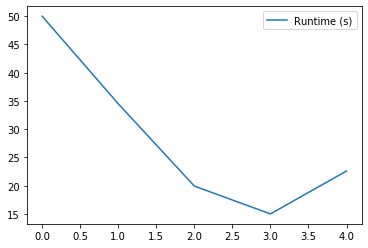

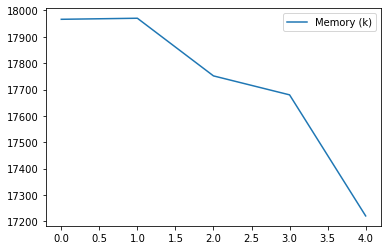

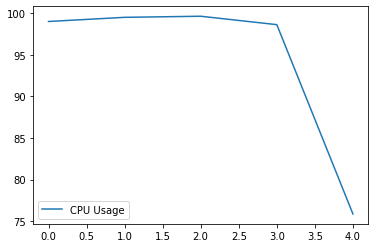

In [93]:
strRuntime = "Runtime (s)"
runtimeData = []
strMemUsage = "Memory (k)"
memUsageData = []
strCpuUsage = "CPU Usage"
cpuUsageData =[]
for key in finalPlotJson:
    runtimeData.append({"Cores": key, strRuntime:finalPlotJson[key][strRuntime]})
    memUsageData.append({"Cores": key, strMemUsage:finalPlotJson[key][strMemUsage]})
    cpuUsageData.append({"Cores": key, strCpuUsage:finalPlotJson[key][strCpuUsage]})

df3 = pd.DataFrame(runtimeData)
df4 = pd.DataFrame(memUsageData)
df5 = pd.DataFrame(cpuUsageData)

df3.plot()
df4.plot()
df5.plot()
plt.show()